# Overview
One of the most important steps in a machine learning project is exploring the dataset and gaining an understanding of what the data and task are. In this notebook, we will explore our dataset and analyze the variables contained in our dataset. See the Kaggle website for an explanation of this dataset and where it comes from: [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database/home).


In [1]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Outcome variable
The **outcome variable** is the value that we want our classifier to learn. This is also known as the **dependent variable**, or in machine learning terminology the **label**. In this case, the outcome variable is whether or not a patient has diabetes, and it is contained in the "**Outcome**" column. **"1"** means that the patient has diabetes (positive class), while a **"0"** means that the patient does not have diabetes (negative class).

### TODO
Get the count of patients with and without diabetes in the **"Outcome"** column. Then plot it as a barplot.

In [3]:
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

<AxesSubplot:xlabel='Outcome'>

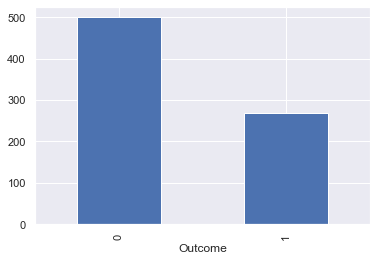

In [4]:
df.groupby("Outcome").size().plot.bar()

# Independent Variables
The **independent variables** in a dataset are the other values in a dataset which can be used to predict the outcome variable. These are called **features** or **predictors** in ML terminology. Later, we'll separate the features and labels. First, let's take a look at our entire dataset.


### TODO
Call `df.describe()` to get a summary of a dataset. Then create a histogram for each of the columns in the dataset.

- Take a look at the values in each column. Consider the min, max, and mean values
- Do the values in the dataset make sense with the real-world values they represent?
- Are there any outstanding questions you have? Does anything not make sense?

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
len(df)

768

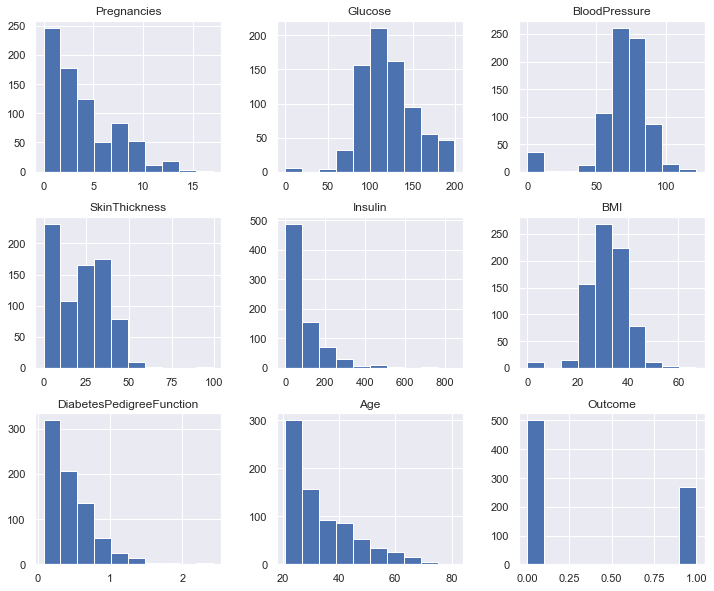

In [7]:
_ = df.hist(figsize=(12, 10))

# Correlation
One informative analysis we can do with our dataset is to look at the **correlation** between our variables. We've dealt with this before when analyzing the relationship between *systolic* and *diastolic blood pressure* in MIMIC patients. We can then look at which variables correlate most strongly with the outcome variable - these may be the features which are informative to our classifier.

### TODO
Let's visualize the correlation of our variables. We can calculate the correlation between each of the variables by generating a **corelation matrix**, which is a table where rows and columns represent the variables and the cells contain the correlation of the two intersecting variable. We can then visualize this with a **heat map**, which uses a grid and encodes the value with the color.

- Create a dataframe containing the corrlation matrix of each column with each other column by calling the `.corr()` method of the DataFrame
- Generate a matplotlib figure. To increase the size, we'll set the `figsize` to be (12, 9)
- Call `sns.heatmap` and pass in the correlation matrix. Other arguments for customizing the plot have already been filled in

In [8]:
# 1. Generate correlation table and heatmap
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


/var/folders/sh/sk9tgnm50_sfyn9wlc1n5d_r0000gn/T/ipykernel_18927/853595926.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

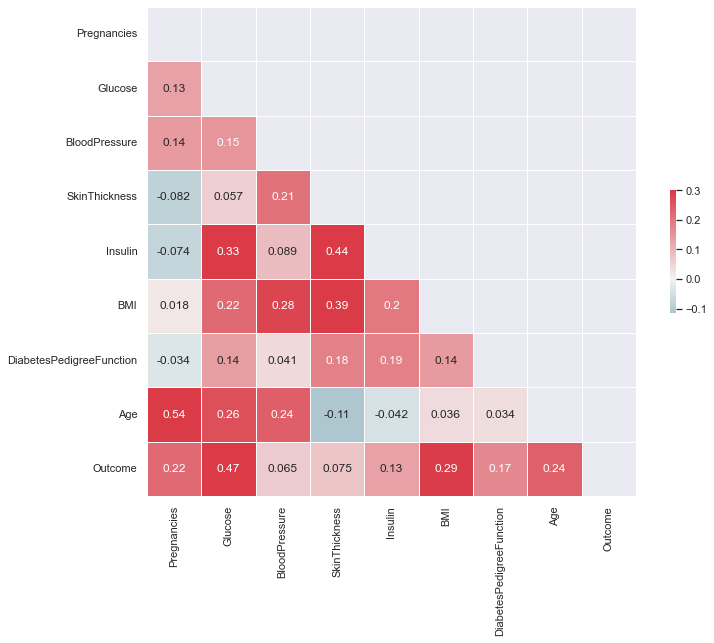

In [9]:
# 2. Set up the matplotlib figure size
fig, ax = plt.subplots(figsize=(12, 9))

# Some additional settings to make the plot prettier
# and only show below the diagonal
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 3. Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .25})

### Discussion
- Explain the heat map. How does this visually represent the correlation of the dataset?
- Looking at the plot above, which variables correlate most strongly to whether a patiet has diabetes?
- What other variables have a strong correlation with each other?
- Do any of the correlations surprise you?

# Deep-Dive Comparative Analysis
Now that we know which variables are likely to be related to our outcome variable, let's do a deeper analysis comparing some of the most important variables between positive and negative patients.

### TODO
- Using boolean indexing, separate the data into two subgroups:
    - `neg`: Patients without diabetes
    - `pos`: Patients with diabetes
    

In [10]:
pos = df[df["Outcome"] == 1]
neg = df[df["Outcome"] == 0]

### TODO
Now, pick one of the variables which you want to analyze. Pick one of the variables with a strong correlation to diabetes so we can analyze how this variable can be informative to our task. Save the column name to a variable called `varname`.

Next, generate three plots:
- A histogram of the overall distribution of the variable (not separated by group)
- Two histograms overlaid on top of each other comparing the positive and negative patients
- A boxplot stratified by Outcome

In [11]:
var_name = "Glucose"

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall Distribution of Glucose')

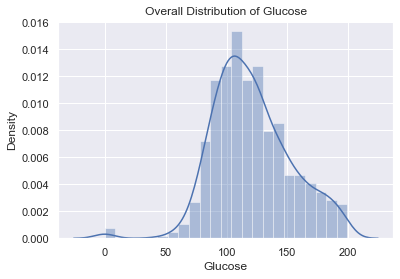

In [12]:
# 1. Generate a histogram of the entire population
sns.distplot(df[var_name])
plt.title("Overall Distribution of {}".format(var_name))

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Glucose stratified by Outcome')

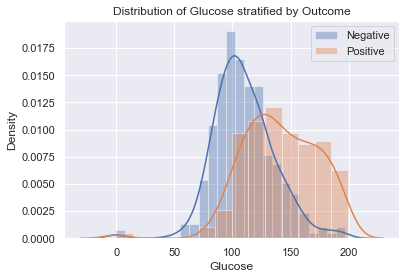

In [13]:
# 2. Create separate histograms for positive and negative patients
ax = sns.distplot(neg[var_name],label="Negative", color="C0")
sns.distplot(pos[var_name], label="Positive", color="C1")
ax.legend()
plt.title("Distribution of {} stratified by Outcome".format(var_name))

Text(0.5, 1.0, 'Boxplot of Glucose stratified by Outcome')

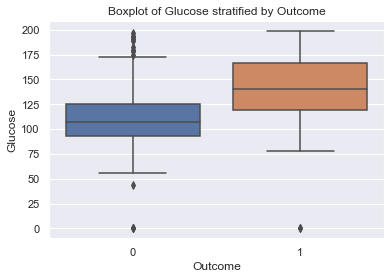

In [14]:
# 3. Create a boxplot for each population
sns.boxplot(x="Outcome", y=var_name, data=df)
plt.title("Boxplot of {} stratified by Outcome".format(var_name))

# Next Steps
Now that we have an understanding of what's in our dataset, there are a few data processing steps which we need to take care of before we can start modeling.

[./02-data-prep.ipynb](./02-data-prep.ipynb)